<a href="https://colab.research.google.com/github/JonathanJuradoS/Arboles_Desicion/blob/main/Espacio_Practico_Empty_25042025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **CURSO DE IA DE LA UNVERSIDAD UTP 2025**##
## **DOCENTE: Jonathan A. Jurado Sandoval**##


---


**En el presente notebook, desarrollaremos tareas para la comprensión y preprocesamiento de datos tales como:**

1. Exploración de datos

  1.1. Análisis Univariado
  - Prueba de normalidad

  1.2. Análisis Bivariado
  
  1.3. Visualizaciones
2. Identificación y tratamiento de valores faltantes
3. Identificación y tratamiento de outliers (valores atipicos)
4. Transformación de datos
5. Análisis de Correlación

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [ ]:
# Cargar el dataset Titanic
df = sns.load_dataset("titanic")

# Definir descripciones para cada columna
descriptions = {
    'survived': '0 = No sobrevivió, 1 = Sobrevivió',
    'pclass': 'Clase del pasajero: 1 = Primera, 2 = Segunda, 3 = Tercera',
    'sex': 'Sexo del pasajero ("male"/"female")',
    'age': 'Edad en años (valores faltantes para algunos registros)',
    'sibsp': 'Número de hermanos/esposos a bordo',
    'parch': 'Número de padres/hijos a bordo',
    'fare': 'Tarifa pagada',
    'embarked': 'Puerto de embarque ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)',
    'class': 'Clase como texto ("First", "Second", "Third")',
    'who': 'Categoría demográfica: "man", "woman" o "child"',
    'adult_male': 'True si es hombre adulto, False en otro caso',
    'deck': 'Cubierta asignada (A, B, C, ...) — muchos valores faltantes',
    'embark_town': 'Pueblo de embarque ("Cherbourg", "Queenstown" o "Southampton")',
    'alive': '"yes"/"no" — equivalente a survived',
    'alone': 'True si viaja sin familiares (sibsp + parch = 0)'
}

# Construir el DataFrame del diccionario de datos
data_dict = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de dato': [str(df[col].dtype) for col in df.columns],
    'Descripción': [descriptions.get(col, '') for col in df.columns]
})

# Mostrarlo en Colab
display(data_dict)



,Columna,Tipo de dato,Descripción
0,survived,int64,"0 = No sobrevivió, 1 = Sobrevivió"
1,pclass,int64,"Clase del pasajero: 1 = Primera, 2 = Segunda, ..."
2,sex,object,"Sexo del pasajero (""male""/""female"")"
3,age,float64,Edad en años (valores faltantes para algunos r...
4,sibsp,int64,Número de hermanos/esposos a bordo
5,parch,int64,Número de padres/hijos a bordo
6,fare,float64,Tarifa pagada
7,embarked,object,"Puerto de embarque (""C"" = Cherbourg, ""Q"" = Que..."
8,class,category,"Clase como texto (""First"", ""Second"", ""Third"")"
9,who,object,"Categoría demográfica: ""man"", ""woman"" o ""child"""


  ## **1. Exploración de Datos**

In [ ]:
# 1. Carga de datos
  # Si no tienes conexión, primero descarga el CSV:
  #!wget -q https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv -O titanic.csv
  # Carga el CSV
  #df = pd.read_csv("titanic.csv")
df = sns.load_dataset("titanic")


In [ ]:
# mostrar las 5 primeras lineas del dataset titanic


In [ ]:
#mostrar numero de filas y columnas del dataset


In [ ]:
#Informacion del dataframe


In [ ]:
# Cualitativas
## Nominal:
#- survived      (0/1 → No/Sí)
#- sex           (“male”/“female”)
#- embarked      (“C”, “Q”, “S”)
#- who           (“man”/“woman”/“child”)
#- adult_male    (True/False)
#- deck          (“A”–“G”, NaN)
#- embark_town   (“Cherbourg”/“Queenstown”/“Southampton”)
#- alive         (“yes”/“no”)
#- alone         (True/False)

## Ordinal:
#- pclass        (1 = Primera, 2 = Segunda, 3 = Tercera)
#- class         (“First”/“Second”/“Third”)

# Cuantitativas
## Discreta:
#- sibsp         (número de hermanos/esposos a bordo)
#- parch         (número de padres/hijos a bordo)

## Continua:
#- age           (edad en años)
#- fare          (tarifa pagada)

#tipos de variable (int64, object, float64, ect)


  ## **1.1. Análisis Univariado**

In [ ]:
# mostrar la media, mediana y la moda de los datos cuantitativos
# interpretar la informacion

# Variables cuantitativas
quant_vars = ['sibsp', 'parch', 'age', 'fare']

# Calcular media, mediana y moda


### **CUARTILES**
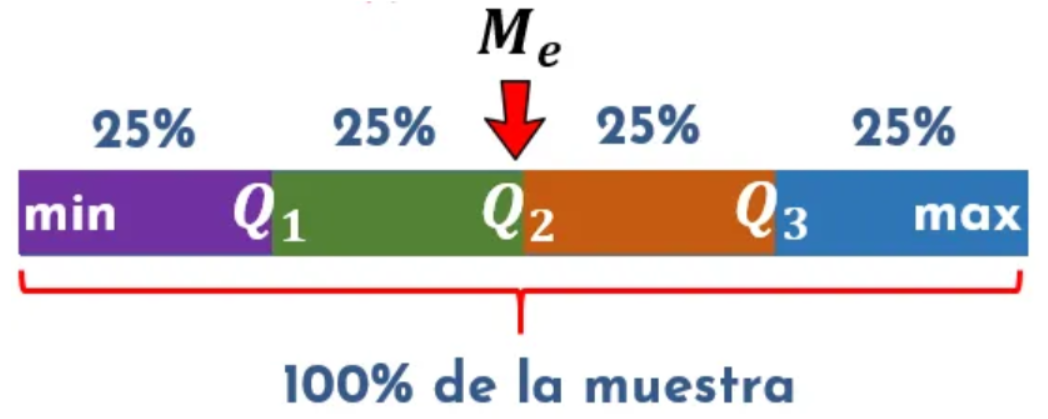

In [ ]:
# Calcular cuartiles



In [ ]:
#min, max de datos cuantitativos
# Calcular min y max



### **Rango intercuartílico**
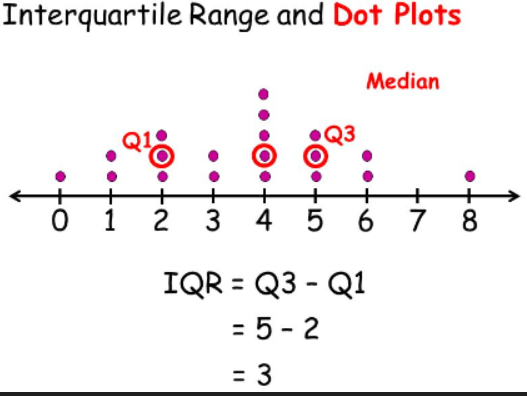

In [ ]:
#Rango Interciuartilico del campo Edad


In [ ]:
#varianza


In [ ]:
#desviación estándar


In [ ]:
df['age'].std(ddof=0) #poblacional

In [ ]:
df['age'].std(ddof=1) #muestral

In [ ]:
#resumen
df['age'].describe()

### Buscar Nullos

In [ ]:
# Calcular nulos


Decidir estrategia de imputación para age (p. ej. mediana por grupo).

Eliminar o imputar deck si realmente la necesitas (o reemplazar por “Unknown”).

Para embarked/embark_town quizá imputar con la moda (el puerto más frecuente).

### Imputando varaibles Nulas

In [ ]:
# 1. Obtener medianas de 'age' por 'pclass'


# 2. Imputar directamente en 'age'




### Prueba de Normalidad###
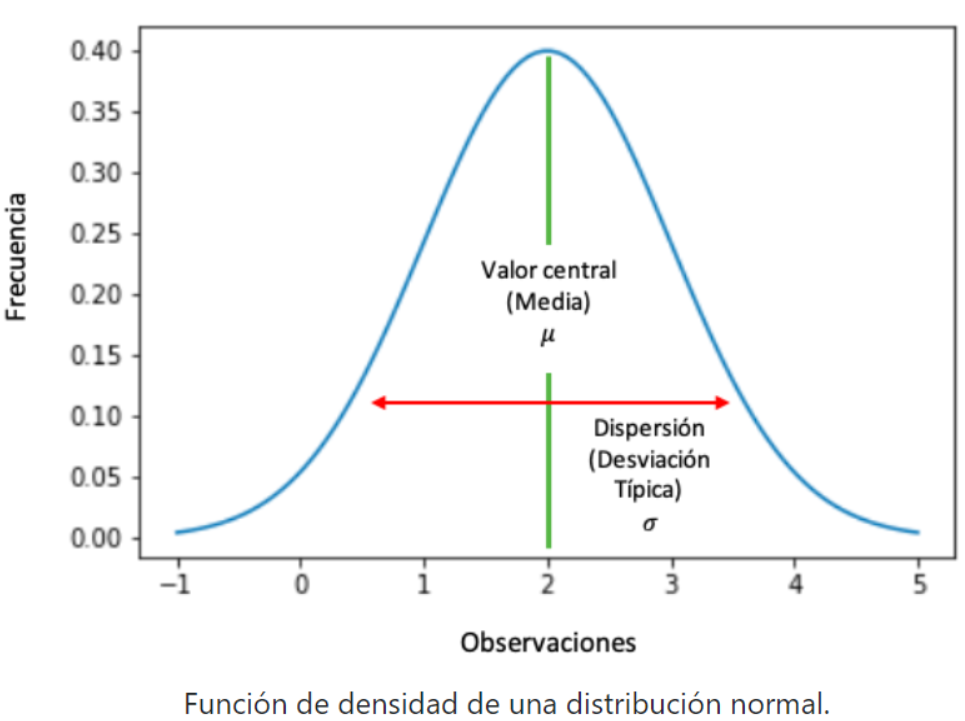

- **Es simétrica.** El valor de la media, la mediana y la moda coinciden. Matemáticamente,
Media = Mediana = Moda

- **Distribución unimodal.** Los valores que son más frecuentes o que tienen más probabilidad de aparecer están alrededor de la media. En otras palabras, cuando nos alejamos de la media, la probabilidad de aparición de los valores y su frecuencia desci

In [ ]:
#Prueba de normalidad
#Ho: La variable se aproxima a una distribución normal
#Ha: La variable no se aproxima a una distribución normal

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, las variable no se aproxima a una distribución normal
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, las variable se aproxima a una distribución normal
#shapiro

import scipy.stats as ss
ss.shapiro(df.fare)

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

In [ ]:

df = sns.load_dataset("titanic")
ages = df['age'].dropna()  # eliminar NaN

# Aplicar Shapiro–Wilk
stat, p = ss.shapiro(ages)
print(f"Estadístico W = {stat:.4f}, p-valor = {p:.4f}")

if p > 0.05:
    print("No se rechaza H₀: la edad se distribuye aproximadamente normal.")
else:
    print("Se rechaza H₀: la edad NO sigue una distribución normal.")


In [ ]:
#El test de D’Agostino–Pearson
ss.normaltest(ages)

El test de D’Agostino–Pearson (normaltest) confirma lo que ya vimos con Shapiro:

Estadístico = 18.105

p-valor ≈ 1.17 × 10⁻⁴ (< 0.05)

Interpretación

H₀: los datos provienen de una distribución normal.

p-valor muy bajo: rechazamos H₀ → la edad no sigue una distribución normal.

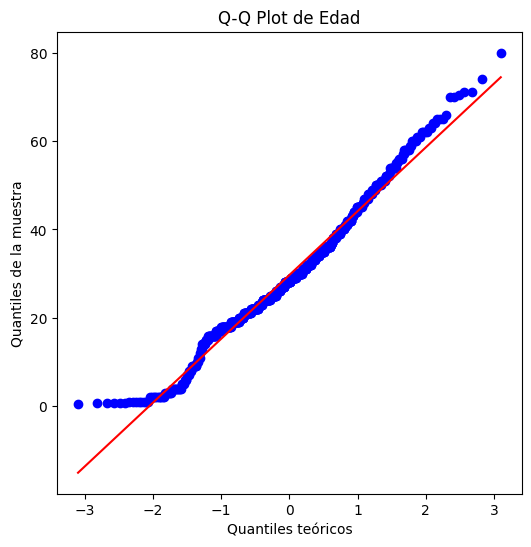

In [ ]:
import matplotlib.pyplot as plt

# Cargar dataset Titanic
df = sns.load_dataset("titanic")

# Preparar datos
ages = df['age'].dropna()

# Q-Q plot usando scipy.stats.probplot
plt.figure(figsize=(6, 6))
stats.probplot(ages, dist="norm", plot=plt)
plt.title("Q-Q Plot de Edad")
plt.xlabel("Quantiles teóricos")
plt.ylabel("Quantiles de la muestra")
plt.show()

## **1.2. Análisis Bivariado**

In [ ]:
#2.Análisis Bivariado
# coeficiente de correlación
# Si las variables se aproximan a una distribución normal => Pearson
# Si las variables no se aproximan a una distribución normal => Spearman
#data.corr()
#data.loc[:,['age','fare']].corr(method = "pearson")
df.loc[:,['age','fare']].corr(method = "spearman")

Valor positivo pequeño (≈0.14): sugiere que, en términos generales, a mayor edad del pasajero, tiende a pagarse un poco más de tarifa.

Magnitud débil: dado que está muy cerca de 0, la relación es ligera; la edad explica muy poco la variación en la tarifa.

In [ ]:
# 2. Codificar sexo
df['sex_num'] = df['sex'].map({'male': 0, 'female': 1})

# 3. Calcular correlación Pearson
corr = df[['sex_num', 'survived']].corr(method='pearson').loc['sex_num', 'survived']
print(f"Correlación Pearson (sexo vs. sobrevivió): {corr:.4f}")

Interpretación
ρ ≈ 0.54 indica una asociación moderada-fuerte y positiva entre ser mujer y sobrevivir.

Es decir, ser “female” (sex_num=1) se asocia a una probabilidad de supervivencia mucho mayor que ser “male” (sex_num=0).

In [ ]:
#Prueba de correlación
#Ho: las variables no están correlacionadas
#Ha: las variables están correlacionadas

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, las variables están correlacionadas
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, las variables no están correlacionadas

# Selección de variables cuantitativas
vars_quant = ['age', 'fare']

# Correlación Pearson (para comparar)
pearson_corr = df[vars_quant].corr(method='pearson')
print("Pearson:\n", pearson_corr)

# Correlación Spearman (no paramétrico)
spearman_corr = df[vars_quant].corr(method='spearman')
print("\nSpearman:\n", spearman_corr)

### Para explorar la relación entre edad (continua) y alive (sí/no)

In [ ]:

#Si p < 0.05 → diferencia significativa.
#Si p ≥ 0.05 → no hay evidencia de que las distribuciones difieran.


from scipy.stats import mannwhitneyu

# 3. Resumen descriptivo por grupo
group_stats = df.groupby('alive')['age'].agg(['mean','median','count','std']).round(2)
print("Estadísticas de edad por alive:\n", group_stats)

# 4. Boxplot comparativo
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='alive', y='age', palette=['#FF6B6B','#4ECDC4'])
plt.title("Edad según estado alive")
plt.xlabel("Alive (no / yes)")
plt.ylabel("Edad")
plt.show()

# 5. Prueba Mann–Whitney U
ages_yes = df.loc[df.alive=='yes','age'].dropna()
ages_no  = df.loc[df.alive=='no', 'age'].dropna()

stat, p = mannwhitneyu(ages_yes, ages_no, alternative='two-sided')
print(f"\nMann–Whitney U = {stat:.2f}, p-valor = {p:.4f}")
if p < 0.05:
    print("→ Diferencia significativa en edad entre grupos")
else:
    print("→ No se detecta diferencia significativa")


Si el test muestra p-valor bajo, concluiríamos que la edad difiere estadísticamente entre los que vivieron y los que no.

Si no, aunque las medias difieran, esa diferencia podría deberse al azar.

## GRAFICOS

In [ ]:
sns.boxplot(y='age',data=df)
plt.title("Boxplot de Edad")
plt.show()

In [ ]:
# 2. Calcular tasa de supervivencia por sexo (mean de 0/1)
surv_rate = df.groupby('sex')['survived'].mean()

# 3. Graficar con matplotlib
plt.figure(figsize=(6, 4))
surv_rate.plot(kind='bar')
plt.title("Tasa de supervivencia por sexo")
plt.xlabel("Sexo")
plt.ylabel("Proporción de sobrevivientes")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
